In [ ]:
from keras.datasets import mnist

### Importing Libraries
%tensorflow_version 2.x
import tensorflow as tf

import keras
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
#add noise to the images
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

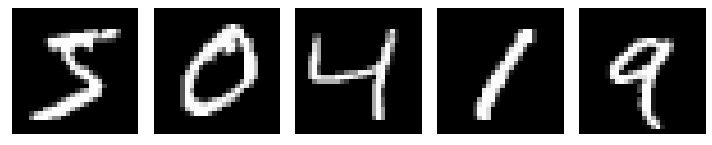

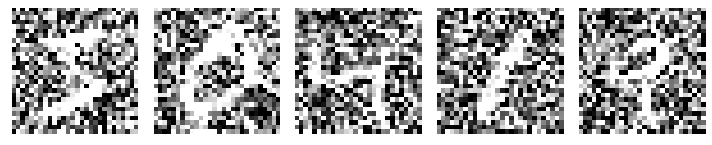

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainXNoisy[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

f = 16

x = Conv2D(f, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(f, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, f)

x = Conv2D(f, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(f, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# train the convolutional autoencoder
H = autoencoder.fit(
	trainXNoisy, trainX,
	validation_data=(testXNoisy, testX),
	epochs=50,
	batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5773 - val_loss: 0.4880
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4698 - val_loss: 0.4588
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4388 - val_loss: 0.4236
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3977 - val_loss: 0.3740
Epoch 5/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3449 - val_loss: 0.3224
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3038 - val_loss: 0.2905
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - val_loss: 0.2723
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2662 - val_loss: 0.2613
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2571 - val_loss: 0.2533
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.249

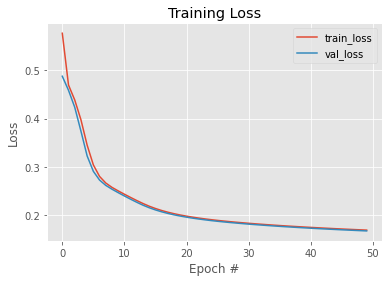

In [ ]:
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

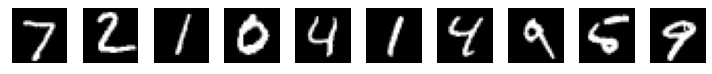

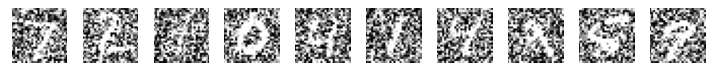

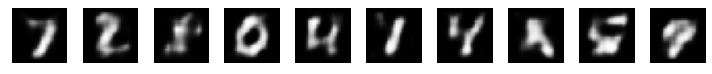

In [ ]:
# predict the reconstructed images for the original images
pred = autoencoder.predict(testXNoisy)
## Visualizing our results

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(testX[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(testXNoisy[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualise reconstructed images(output of autoencoder)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()